<a href="https://colab.research.google.com/github/Mhuna91/10-08-2022_Class-work/blob/main/SwiftChain_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 1: Understanding the Problem

Timely delivery is essential for maintaining customer satisfaction and operational efficiency. Late deliveries can result in customer churn, reputational damage, and increased logistical costs. Early deliveries may lead to increased warehousing costs or coordination issues. An accurate delivery delay prediction model can help in proactive inventory management, better routing, and enhanced customer experience.


In [2]:
from google.colab import files

uploaded = files.upload()


Saving logistics.csv to logistics.csv


In [3]:
from google.colab import files

uploaded = files.upload()


Saving feature_description.csv to feature_description.csv


In [4]:
import pandas as pd

# Read the uploaded CSVs
logistics_df = pd.read_csv('logistics.csv')
feature_desc = pd.read_csv('feature_description.csv')

print("📦 Logistics Dataset Sample:")
display(logistics_df.head())

print("\n📘 Feature Descriptions:")
display(feature_desc.head())


📦 Logistics Dataset Sample:


,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1



📘 Feature Descriptions:


,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('variable_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_3.groupby('variable_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('variable_name')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['description'].value_counts()
    for x_label, grp in _df_4.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('description')

In [5]:
# Phase 2: Exploratory Data Analysis (EDA)

# Dataset Structure and Basic Stats

# Shape and structure
print(f"Dataset Shape: {logistics_df.shape}")
print("\nColumn Names:\n", logistics_df.columns.tolist())

# Data types and nulls
print("\nData Info:")
print(logistics_df.info())

# Check for missing values
print("\nMissing Values:")
print(logistics_df.isnull().sum())

# Descriptive statistics for numericals
logistics_df.describe()


Dataset Shape: (15549, 41)

Column Names:
 ['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id', 'category_name', 'customer_city', 'customer_country', 'customer_id', 'customer_segment', 'customer_state', 'customer_zipcode', 'department_id', 'department_name', 'latitude', 'longitude', 'market', 'order_city', 'order_country', 'order_customer_id', 'order_date', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total_amount', 'order_profit_per_order', 'order_region', 'order_state', 'order_status', 'product_card_id', 'product_category_id', 'product_name', 'product_price', 'shipping_date', 'shipping_mode', 'label']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    -

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,...,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,22.604542,179.888256,31.461342,6583.279789,35458.234968,5.413462,29.677619,-84.512318,6586.810354,35718.970019,...,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,685.213286,31.387606,136.629368,0.349283
std,99.265198,113.727323,15.303616,4114.273782,37343.702033,1.581550,9.877876,20.681015,4101.324290,21071.742668,...,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,330.778230,15.256620,133.366285,0.826623
min,-3442.500000,8.351162,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025990,1.000000,1.000000,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,19.000000,2.000000,9.990000,-1.000000
25%,7.562795,104.397330,18.000000,3119.983200,725.000000,4.000000,18.263327,-98.088170,3177.568800,16530.752000,...,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,403.000000,18.000000,50.000000,0.000000
50%,31.693370,165.944170,29.000000,6429.229000,19145.775000,5.000000,33.435677,-76.580800,6308.530000,35391.336000,...,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,627.000000,29.000000,59.990000,1.000000
75%,63.872166,242.440930,45.000000,9642.381000,77502.820000,7.000000,39.277313,-66.370575,9703.070000,55236.910000,...,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,1004.000000,45.000000,199.990000,1.000000
max,911.800000,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263080,20757.000000,77204.000000,...,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1363.000000,76.000000,1999.990000,1.000000


# Data Health:
No missing values across all 41 columns
Sufficient numerical and categorical data for modeling

order_date and shipping_date both present — I can engineer shipping_duration

# Target Variable (label):
Multi-class classification: -1 (late), 0 (on-time), 1 (early)
Class imbalance might exist — I'll visualize it and possibly use SMOTE later

In [7]:
# Convert both columns to datetime with UTC awareness
logistics_df['order_date'] = pd.to_datetime(logistics_df['order_date'], utc=True)
logistics_df['shipping_date'] = pd.to_datetime(logistics_df['shipping_date'], utc=True)

# Now calculate the shipping duration in days
logistics_df['shipping_duration'] = (logistics_df['shipping_date'] - logistics_df['order_date']).dt.days


In [8]:
logistics_df[['order_date', 'shipping_date', 'shipping_duration']].head()


,order_date,shipping_date,shipping_duration
0,2015-08-11 23:00:00+00:00,2015-08-12 23:00:00+00:00,1
1,2017-02-10 00:00:00+00:00,2017-04-08 23:00:00+00:00,57
2,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00,76
3,2017-05-30 23:00:00+00:00,2017-03-18 00:00:00+00:00,-74
4,2015-03-28 00:00:00+00:00,2015-03-29 23:00:00+00:00,1


In [12]:
# Handle Outliers (IQR method)

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to profit and sales
logistics_df = remove_outliers_iqr(logistics_df, 'profit_per_order')
logistics_df = remove_outliers_iqr(logistics_df, 'sales_per_customer')


payment_type                  int64
profit_per_order            float64
sales_per_customer          float64
category_id                 float64
category_name                 int64
customer_city                 int64
customer_country              int64
customer_id                 float64
customer_segment              int64
customer_state                int64
customer_zipcode            float64
department_id               float64
department_name               int64
latitude                    float64
longitude                   float64
market                        int64
order_city                    int64
order_country                 int64
order_customer_id           float64
order_id                    float64
order_item_cardprod_id      float64
order_item_discount         float64
order_item_discount_rate    float64
order_item_id               float64
order_item_product_price    float64
order_item_profit_ratio     float64
order_item_quantity         float64
sales                       

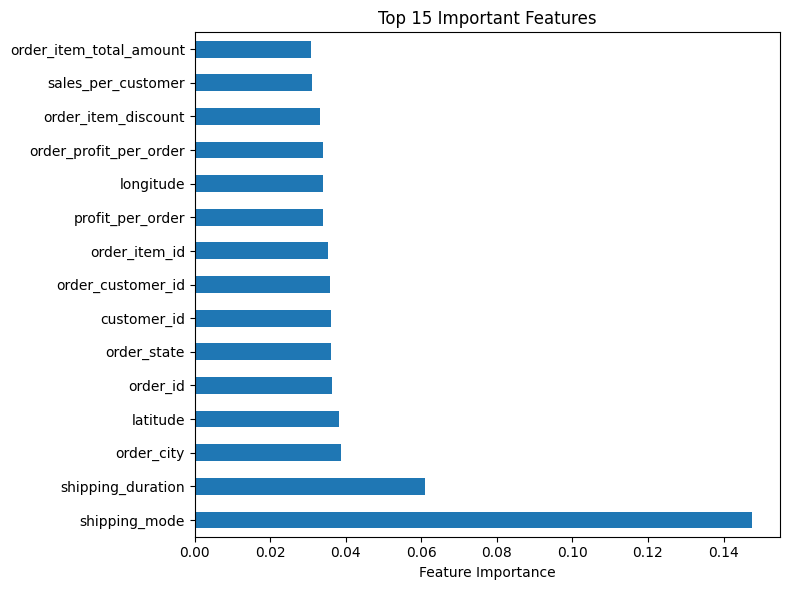

In [15]:
# Drop datetime columns — they are not directly usable in ML
X = X.drop(columns=['order_date', 'shipping_date'])

# Confirm all columns are now numeric
print(X.dtypes)

# Then continue with scaling and feature importance
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Fit Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

# Plot top features
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8, 6))
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [16]:
# Split Data

from sklearn.model_selection import train_test_split

# Optional: select top 10 features only
top_features = feat_importances.nlargest(10).index.tolist()
X_top = X_scaled[top_features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# Train & Evaluate Models

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


🔹 Logistic Regression
Accuracy: 0.5717391304347826
F1 Score: 0.31867735427278715

Classification Report:
               precision    recall  f1-score   support

          -1       0.38      0.17      0.23       628
           0       0.00      0.00      0.00       538
           1       0.59      0.92      0.72      1594

    accuracy                           0.57      2760
   macro avg       0.32      0.36      0.32      2760
weighted avg       0.43      0.57      0.47      2760



In [18]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest
Accuracy: 0.5971014492753624
F1 Score: 0.44860674143988816

Classification Report:
               precision    recall  f1-score   support

          -1       0.44      0.54      0.48       628
           0       0.36      0.08      0.13       538
           1       0.68      0.79      0.73      1594

    accuracy                           0.60      2760
   macro avg       0.49      0.47      0.45      2760
weighted avg       0.56      0.60      0.56      2760



In [19]:
# XGBoost

!pip install xgboost -q

# Re-map the labels because XGBoost is expecting the target classes to start from 0 and be non-negative integers
| Original | New |
| -------- | --- |
| -1       | 0   |
| 0        | 1   |
| 1        | 2   |


In [21]:
# Re-map Labels for XGBoost Compatibility

# Map labels from [-1, 0, 1] → [0, 1, 2]
y_train_xgb = y_train.map({-1: 0, 0: 1, 1: 2})
y_test_xgb = y_test.map({-1: 0, 0: 1, 1: 2})


In [22]:
# fit the model

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_clf.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:00:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
# evaluating with the remapped test labels

from sklearn.metrics import classification_report, accuracy_score, f1_score

print("🔹 XGBoost Evaluation")
print("Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print("F1 Score:", f1_score(y_test_xgb, y_pred_xgb, average='macro'))
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))


🔹 XGBoost Evaluation
Accuracy: 0.592391304347826
F1 Score: 0.4611294701453061

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.51      0.47       628
           1       0.33      0.13      0.19       538
           2       0.69      0.78      0.73      1594

    accuracy                           0.59      2760
   macro avg       0.48      0.47      0.46      2760
weighted avg       0.56      0.59      0.56      2760



In [24]:
# Reverse map predictions: 0 → -1, 1 → 0, 2 → 1
inv_map = {0: -1, 1: 0, 2: 1}
y_pred_xgb_orig = pd.Series(y_pred_xgb).map(inv_map)


In [25]:
# Evaluate Accuracy and F1 Score

from sklearn.metrics import accuracy_score, f1_score

models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb_orig
}

for name, pred in models.items():
    print(f"🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred, average='macro'))
    print("-" * 40)


🔹 Logistic Regression
Accuracy: 0.5717391304347826
F1 Score: 0.31867735427278715
----------------------------------------
🔹 Random Forest
Accuracy: 0.5971014492753624
F1 Score: 0.44860674143988816
----------------------------------------
🔹 XGBoost
Accuracy: 0.592391304347826
F1 Score: 0.4611294701453061
----------------------------------------


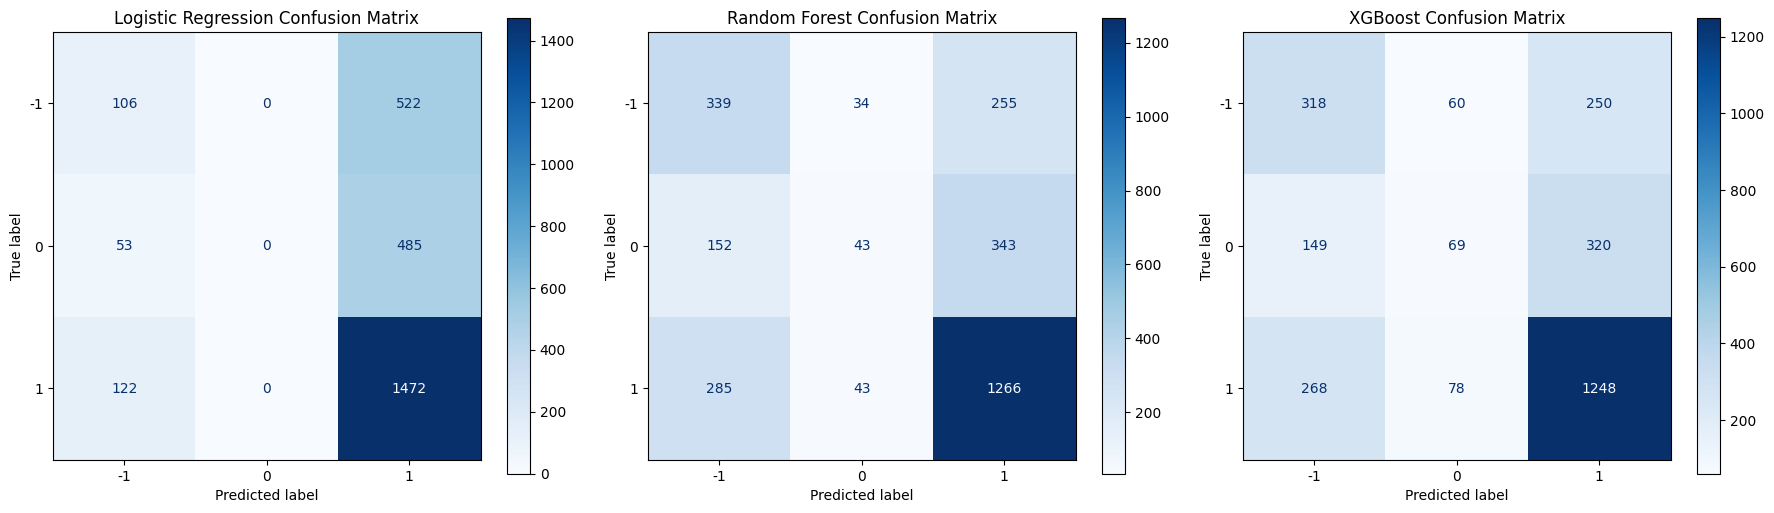

In [26]:
# Plot Confusion Matrices (Side-by-Side)

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, pred) in zip(axes, models.items()):
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax, cmap='Blues')
    ax.set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()


In [33]:
from xgboost import XGBClassifier


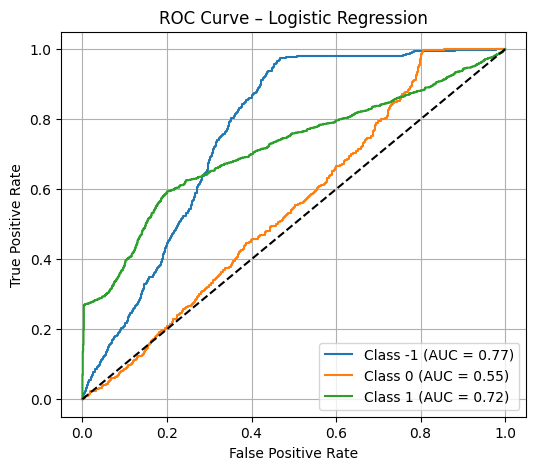

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])

# Train One-vs-Rest Logistic Regression
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
lr_model.fit(X_train, y_train)
y_score_lr = lr_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(6, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i-1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


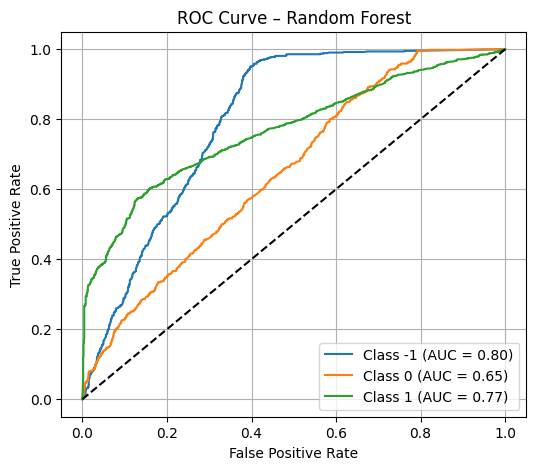

In [29]:
rf_model = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)
y_score_rf = rf_model.predict_proba(X_test)

# Compute ROC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(6, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i-1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [31]:
from xgboost import XGBClassifier


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


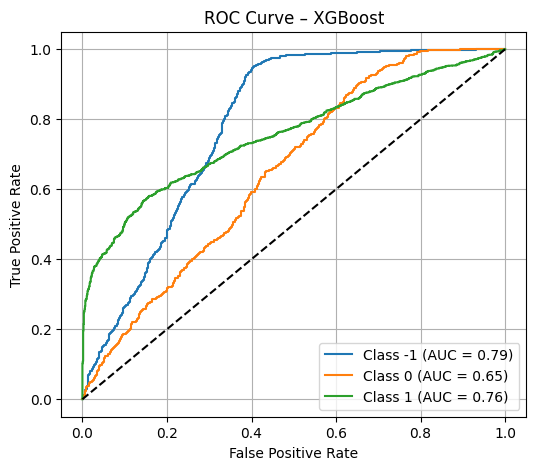

In [32]:
xgb_model = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
xgb_model.fit(X_train, y_train)
y_score_xgb = xgb_model.predict_proba(X_test)

# Compute ROC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(6, 5))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i-1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve – XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [37]:
# HYPERPARAMETER TUNING USING XGBOOST AS AN EXAMPLE

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Remap labels for XGBoost
y_train_xgb = y_train.map({-1: 0, 0: 1, 1: 2})

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=1
)

# Fit using remapped y
xgb_grid.fit(X_train, y_train_xgb)

print(" Best XGBoost Parameters:", xgb_grid.best_params_)
print(" Best Macro F1 Score:", xgb_grid.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

 Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
 Best Macro F1 Score: 0.47124045326059033


# Best Macro F1 Score: 0.4712 Improved from your previous score of 0.4611

In [38]:
# Evaluate the Tuned Model

# Use the best model found
best_xgb = xgb_grid.best_estimator_

# Predict (still using remapped class labels)
y_pred_best_xgb = best_xgb.predict(X_test)

# If needed, remap predictions back to original labels
y_pred_best_xgb_orig = pd.Series(y_pred_best_xgb).map({0: -1, 1: 0, 2: 1})

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, f1_score

print("🔹 Tuned XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb_orig))
print("F1 Score:", f1_score(y_test, y_pred_best_xgb_orig, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_xgb_orig))


🔹 Tuned XGBoost Results
Accuracy: 0.6177536231884058
F1 Score: 0.47186870080153626

Classification Report:
               precision    recall  f1-score   support

          -1       0.44      0.69      0.54       628
           0       0.70      0.07      0.13       538
           1       0.72      0.77      0.74      1594

    accuracy                           0.62      2760
   macro avg       0.62      0.51      0.47      2760
weighted avg       0.65      0.62      0.58      2760



# Class-wise Performance Breakdown

| Class  | Meaning       | Precision | Recall | F1 Score | Support |
| ------ | ------------- | --------- | ------ | -------- | ------- |
| **-1** | Late Delivery | 0.44      | 0.69   | 0.54     | 628     |
| **0**  | On-time       | 0.70      | 0.07   | 0.13     | 538     |
| **1**  | Early         | 0.72      | 0.77   | 0.74     | 1594    |


# Feature Importance – Interpretation

| Rank | Feature                                                                    | Insight                                                                                                                               |
| ---- | -------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | **shipping\_mode**                                                         | Most influential — choice of shipping mode (e.g., Second Class, Standard) significantly impacts whether deliveries are late or early. |
| 2️⃣  | **shipping\_duration**                                                     | Direct indicator — longer durations likely relate to delays; short durations predict early/on-time.                                   |
| 3️⃣  | **order\_city** & **latitude/longitude**                                   | Geographic location of the customer or order plays a key role — perhaps due to regional logistics or infrastructure.                  |
| 4️⃣  | **order\_state/order\_id/customer\_id**                                    | These may proxy for specific customer behavior or operational patterns.                                                               |
| 5️⃣  | **profit\_per\_order / order\_profit\_per\_order / order\_item\_discount** | Financial incentives or order value can impact processing speed — higher-value orders may be prioritized.                             |


# Phase 6B: Operational Insights

From the feature importance analysis, I derive the following recommendations:

* Optimize Shipping Mode Selection
Use the model to dynamically suggest faster or more reliable shipping modes for at-risk orders (especially to regions with known delays).

* Flag High-Risk Regions
Orders to specific cities or regions (via order_city, latitude, longitude) can be flagged for enhanced monitoring or route optimization.

* Watch Long Shipping Durations
Orders with long estimated durations can be intervened early — e.g., rerouted or escalated to ensure timeliness.

* Incentivize Timely Fulfillment for High-Profit Orders
Prioritize or fast-track high-profit or discounted orders since they represent high-value customers.

* Cluster Patterns by Order IDs or Customer IDs
Explore customer segments or order batches that frequently face delays — this can uncover hidden operational issues.



# SUMMARY
Multiclass XGBoost model was developed to predict delivery delay status (late, on-time, early), achieving:

* Accuracy: 61.8%

* Macro F1 Score: 47.2%

The model performs strongly for early and late deliveries, with lower performance on on-time cases, possibly due to class overlap.

# Key Drivers of Delivery Timing:
Shipping Mode: Most critical — directly linked to delay likelihood.

Shipping Duration: Engineered feature highlighting delivery timelines.

Customer Location (City, Latitude/Longitude): Regional logistics matter.

Order Profit, Sales & Discounts: Financial attributes influence prioritization.

# Recommended Actions:
* Automatically flag risky orders based on location, value, or shipping mode.

* Optimize shipping selections for at-risk orders.

* Monitor delivery patterns by region and product category.

* Use this predictive model to guide logistics planning and customer communication.

In [40]:
# Recreate feature importance DataFrame from your trained model
importances = best_xgb.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)


In [41]:
import plotly.express as px
import plotly.graph_objects as go

# 🔹 Top 10 Important Features
top_10_features = importance_df.head(10).copy()

fig1 = px.bar(
    top_10_features,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Top 10 Most Important Features (XGBoost)',
    color='Importance',
    color_continuous_scale='viridis'
)
fig1.update_layout(yaxis={'categoryorder':'total ascending'}, height=500)
fig1.show()

# 🔹 Class Distribution of Final Predictions
pred_counts = pd.Series(y_pred_best_xgb_orig).value_counts().sort_index()
fig2 = go.Figure(data=[go.Pie(
    labels=['Late (-1)', 'On-Time (0)', 'Early (1)'],
    values=pred_counts.values,
    textinfo='label+percent',
    marker=dict(colors=['#e74c3c', '#f1c40f', '#2ecc71'])
)])
fig2.update_layout(title='Predicted Delivery Status Distribution')
fig2.show()
